In [163]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from sklearn.preprocessing import LabelEncoder

In [164]:
def load_data(dataset_dir):
    images = []
    labels = []
    for malware_type in os.listdir(dataset_dir):
        malware_type_dir = os.path.join(dataset_dir, malware_type)
        for image_name in os.listdir(malware_type_dir):
            image_path = os.path.join(malware_type_dir, image_name)
            image = cv2.imread(image_path)
            images.append(image)
            labels.append(malware_type)
    return images, labels
dataset_dir = 'C:/Users/bnima/Downloads/archive/malware_dataset/train'
images, labels = load_data(dataset_dir)

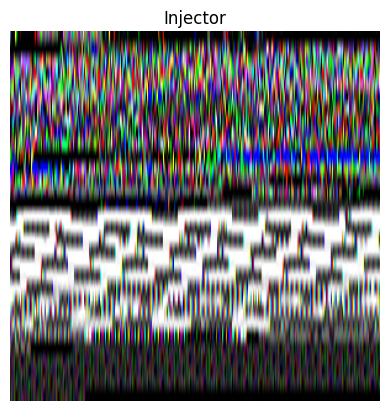

In [165]:
# Définir le nombre d'images à afficher
num_images = 1

# Sélectionner et afficher trois images aléatoires
for _ in range(num_images):
    # Sélectionner aléatoirement une image et son étiquette correspondante
    index = random.randint(0, len(images) - 1)
    image = images[index]
    label = labels[index]

    # Afficher l'image sélectionnée
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

In [166]:
def resize_images(images, target_size=(100,100)):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
    return np.array(resized_images)

In [167]:
resized_images = resize_images(images)

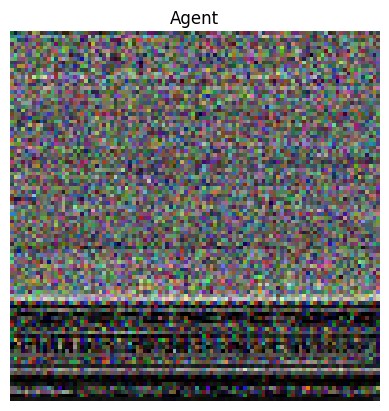

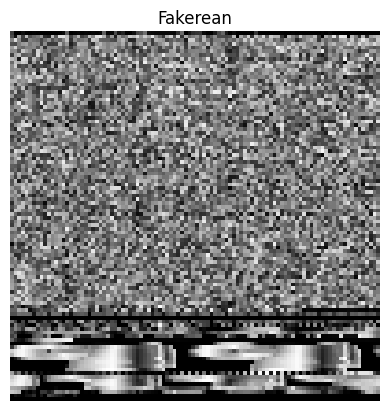

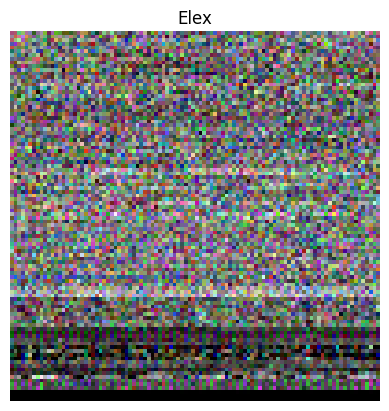

In [168]:
# Définir le nombre d'images à afficher
num_images = 3

# Sélectionner et afficher trois images aléatoires
for _ in range(num_images):
    # Sélectionner aléatoirement une image et son étiquette correspondante
    index = random.randint(0, len(images) - 1)
    image = resized_images[index]
    label = labels[index]

    # Afficher l'image sélectionnée
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

In [169]:
# Normaliser les valeurs de pixel des images
def normalize_images(images):
    normalized_images = images.astype(np.float32) / 255.0
    return normalized_images

In [170]:
normalized_images = normalize_images(resized_images)

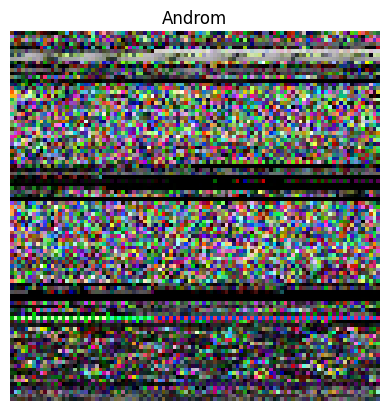

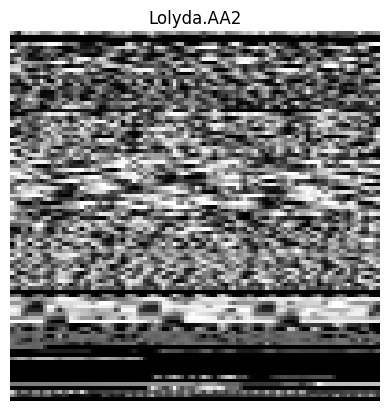

In [171]:
# Définir le nombre d'images à afficher
num_images = 2

# Sélectionner et afficher trois images aléatoires
for _ in range(num_images):
    # Sélectionner aléatoirement une image et son étiquette correspondante
    index = random.randint(0, len(images) - 1)
    image = normalized_images[index]
    label = labels[index]

    # Afficher l'image sélectionnée
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

In [172]:
# Convertir les images en niveaux de gris
def convert_to_grayscale(images):
    grayscale_images = []
    for image in images:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(grayscale_image)
    return np.array(grayscale_images)

In [173]:
grayscale_images = convert_to_grayscale(normalized_images)

In [174]:
def gabor_features(image):
    gabor_kernels = []
    ksize = 31  # Taille du noyau
    for theta in np.arange(0, np.pi, np.pi / 4):  # Orientation du noyau
        for sigma in (1, 3):  # Ecart-type du noyau
            for lamda in np.arange(np.pi / 4, np.pi, np.pi / 4):  # Longueur d'onde
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, 0.5, 0, ktype=cv2.CV_32F)
                gabor_kernels.append(kernel)
                
    features = []
    for kernel in gabor_kernels:
        filtered_img = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        mean = filtered_img.mean()
        variance = filtered_img.var()
        features.extend([mean, variance])
    return features

In [175]:
gabor_features_list = []
for image in grayscale_images:
    features = gabor_features(image)
    gabor_features_list.append(features)

In [176]:
gabor_features_array = np.array(gabor_features_list)

In [177]:
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(gabor_features_array, labels_encoded, test_size=0.2, random_state=42)

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_accuracy = rf_classifier.score(X_test, y_test)
print("Précision du modèle Random Forest :", rf_accuracy)

Précision du modèle Random Forest : 0.9306322897483118


In [182]:
import joblib

joblib.dump(rf_classifier, 'rf_classifier_model.joblib')

['rf_classifier_model.joblib']

In [183]:
import pickle

In [184]:
with open('rf_classifier_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

In [185]:
with open('rf_classifier_model.pkl', 'rb') as f:
    loaded_rf_classifier = pickle.load(f)

In [186]:
predictions = loaded_rf_classifier.predict(X_test)

In [189]:

def preprocess_image(image_path, target_size=(100, 100)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, target_size)
    normalized_image = resized_image.astype(np.float32) / 255.0
    grayscale_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

In [191]:
 
def predict_malware_type(image_path):
    grayscale_image = preprocess_image(image_path)
    features = gabor_features(grayscale_image)
    features = np.array(features).reshape(1, -1)
    prediction = loaded_rf_classifier .predict(features)
    predicted_label = label_encoder.inverse_transform(prediction)
    return predicted_label[0]

# Exemple d'utilisation
image_path = 'agent.png'
malware_type = predict_malware_type(image_path)
print("Le type de malware prédit est :", malware_type)

Le type de malware prédit est : Agent
